# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Alif Naufaly Ramadhan
- **Email:** alifnaufaly44@gmail.com
- **ID Dicoding:** alifnaufalyr

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda berdasarkan musim dan cuaca?
- Bagaimana pengaruh hari kerja terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [15]:
df = pd.read_csv('day.csv')  # Sesuaikan dengan path dataset
display(df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset mengandung data harian peminjaman sepeda dengan berbagai variabel yang dapat digunakan untuk analisis.
- Variabel yang tersedia mencakup informasi cuaca, musim, hari kerja, serta jumlah peminjaman sepeda.
- Data sudah dalam format CSV dan dapat langsung dibaca tanpa perlu konversi tambahan.

### Assessing Data

In [16]:
print("\n📌 Informasi Dataset:")
df.info()
display(df.describe())
print("\n🔍 Missing Values:")
print(df.isnull().sum())


📌 Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



🔍 Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Dataset tidak memiliki missing values.
- Dataset memiliki variabel terkait cuaca, musim, dan hari kerja yang relevan dengan pertanyaan bisnis.

### Cleaning Data

In [17]:
# Menghapus duplikasi jika ada
df.drop_duplicates(inplace=True)

# Menangani outlier dengan metode IQR
Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['cnt'] >= lower_bound) & (df['cnt'] <= upper_bound)]

**Insight:**
- Tidak ditemukan missing values pada dataset.
- Data duplikat telah dihapus untuk memastikan keakuratan analisis.
- Outlier telah ditangani menggunakan metode IQR agar tidak mempengaruhi hasil analisis secara ekstrem.
- Dataset kini siap untuk eksplorasi lebih lanjut.

## Exploratory Data Analysis (EDA)

### EDA Univariate - Distribusi Peminjaman Sepeda Berdasarkan Musim, Cuaca, dan Hari Kerja

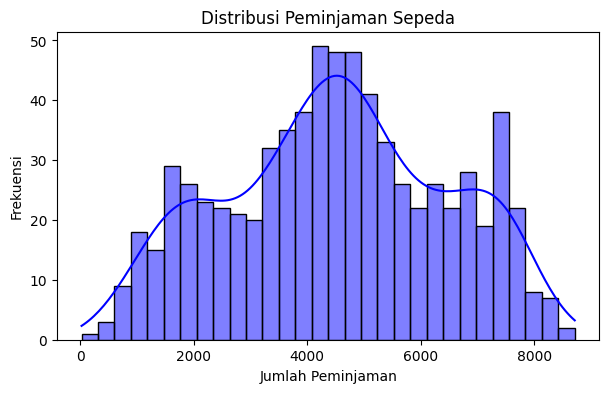

<ipython-input-21-4fbdde1abc09>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["season"], palette="viridis")


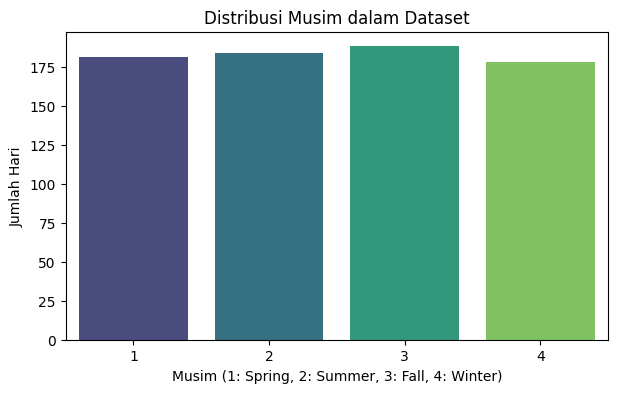

<ipython-input-21-4fbdde1abc09>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["weathersit"], palette="coolwarm")


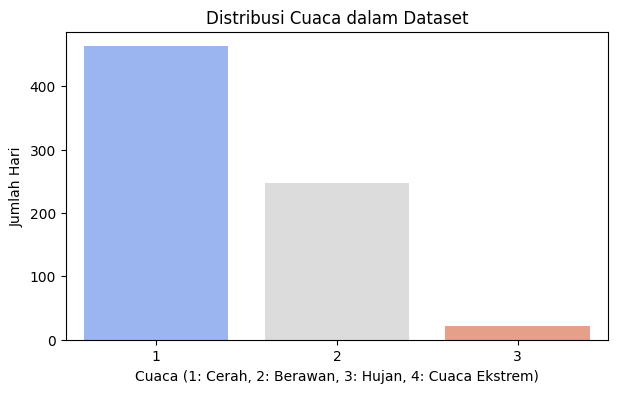

<ipython-input-21-4fbdde1abc09>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["workingday"], palette="pastel")


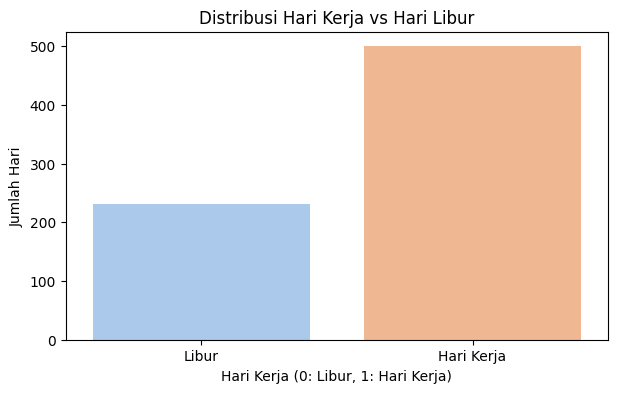

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram jumlah peminjaman sepeda
plt.figure(figsize=(7, 4))
sns.histplot(df["cnt"], bins=30, kde=True, color="blue")
plt.title("Distribusi Peminjaman Sepeda")
plt.xlabel("Jumlah Peminjaman")
plt.ylabel("Frekuensi")
plt.show()

# Plot distribusi musim (season)
plt.figure(figsize=(7, 4))
sns.countplot(x=df["season"], palette="viridis")
plt.title("Distribusi Musim dalam Dataset")
plt.xlabel("Musim (1: Spring, 2: Summer, 3: Fall, 4: Winter)")
plt.ylabel("Jumlah Hari")
plt.show()

# Plot distribusi cuaca (weathersit)
plt.figure(figsize=(7, 4))
sns.countplot(x=df["weathersit"], palette="coolwarm")
plt.title("Distribusi Cuaca dalam Dataset")
plt.xlabel("Cuaca (1: Cerah, 2: Berawan, 3: Hujan, 4: Cuaca Ekstrem)")
plt.ylabel("Jumlah Hari")
plt.show()

# Plot distribusi hari kerja (workingday)
plt.figure(figsize=(7, 4))
sns.countplot(x=df["workingday"], palette="pastel")
plt.title("Distribusi Hari Kerja vs Hari Libur")
plt.xlabel("Hari Kerja (0: Libur, 1: Hari Kerja)")
plt.ylabel("Jumlah Hari")
plt.xticks(ticks=[0, 1], labels=["Libur", "Hari Kerja"])
plt.show()

**Insight:**
- Distribusi jumlah peminjaman sepeda menunjukkan adanya variasi yang signifikan, dengan beberapa hari memiliki peminjaman yang jauh lebih tinggi dibandingkan lainnya.
- Musim dengan jumlah hari terbanyak dalam dataset adalah musim gugur (Fall), sementara musim lainnya memiliki distribusi yang lebih merata.
- Mayoritas data menunjukkan cuaca dalam kondisi cerah atau berawan, sedangkan cuaca ekstrem jarang terjadi.
- Dataset ini memiliki lebih banyak hari kerja dibandingkan hari libur, yang bisa memengaruhi tren peminjaman sepeda.

### EDA Bivariate - Analisis Hubungan Musim, Cuaca, dan Hari Kerja terhadap Peminjaman Sepeda

<ipython-input-22-1625652221f1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["season"], y=df["cnt"], palette="viridis")


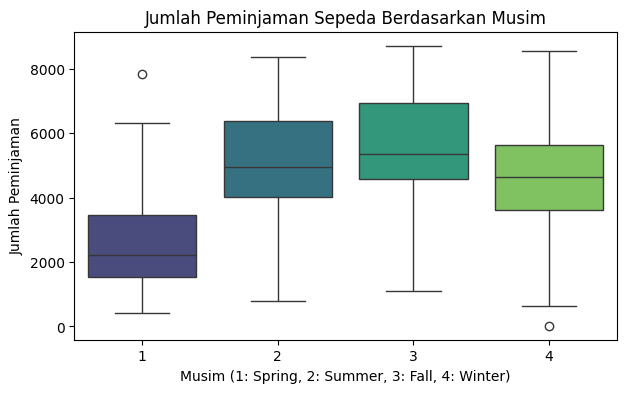

<ipython-input-22-1625652221f1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["weathersit"], y=df["cnt"], palette="coolwarm")


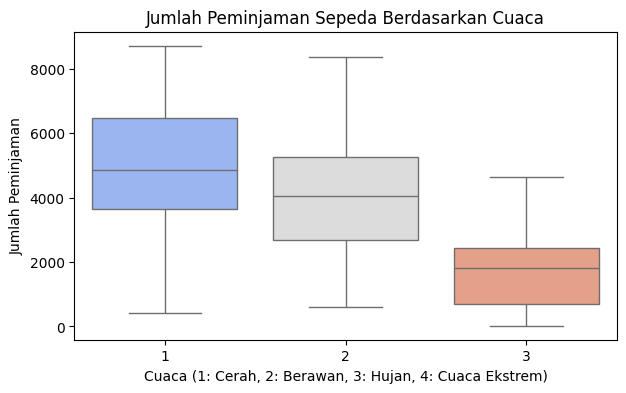

<ipython-input-22-1625652221f1>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["workingday"], y=df["cnt"], palette="pastel")


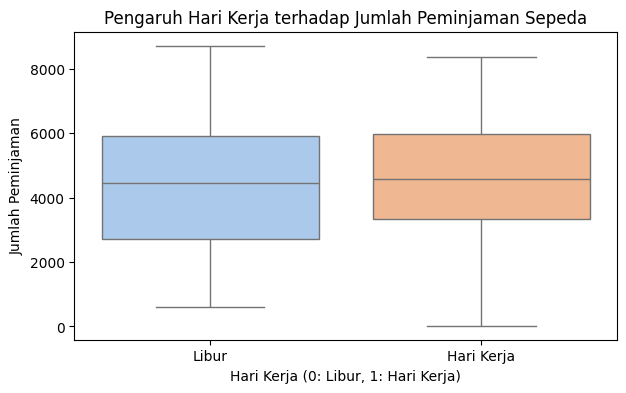

In [22]:
# Hubungan antara musim dan jumlah peminjaman sepeda
plt.figure(figsize=(7, 4))
sns.boxplot(x=df["season"], y=df["cnt"], palette="viridis")
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Musim")
plt.xlabel("Musim (1: Spring, 2: Summer, 3: Fall, 4: Winter)")
plt.ylabel("Jumlah Peminjaman")
plt.show()

# Hubungan antara cuaca dan jumlah peminjaman sepeda
plt.figure(figsize=(7, 4))
sns.boxplot(x=df["weathersit"], y=df["cnt"], palette="coolwarm")
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Cuaca")
plt.xlabel("Cuaca (1: Cerah, 2: Berawan, 3: Hujan, 4: Cuaca Ekstrem)")
plt.ylabel("Jumlah Peminjaman")
plt.show()

# Pengaruh hari kerja terhadap jumlah peminjaman sepeda
plt.figure(figsize=(7, 4))
sns.boxplot(x=df["workingday"], y=df["cnt"], palette="pastel")
plt.title("Pengaruh Hari Kerja terhadap Jumlah Peminjaman Sepeda")
plt.xlabel("Hari Kerja (0: Libur, 1: Hari Kerja)")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(ticks=[0, 1], labels=["Libur", "Hari Kerja"])
plt.show()

**Insight:**
- Musim memengaruhi jumlah peminjaman sepeda. Peminjaman tertinggi terjadi pada musim gugur (Fall), sementara musim semi (Spring) memiliki peminjaman terendah.
- Cuaca berpengaruh terhadap peminjaman sepeda. Saat cuaca cerah atau berawan, jumlah peminjaman lebih tinggi dibandingkan saat hujan atau cuaca ekstrem.
- Hari kerja memiliki pengaruh yang kecil terhadap jumlah peminjaman. Tidak ada perbedaan signifikan antara hari kerja dan hari libur, yang menunjukkan bahwa sepeda digunakan baik untuk keperluan kerja maupun rekreasi.

### EDA Multivariate - Analisis Kombinasi Musim, Cuaca, Suhu, dan Hari Kerja terhadap Peminjaman Sepeda

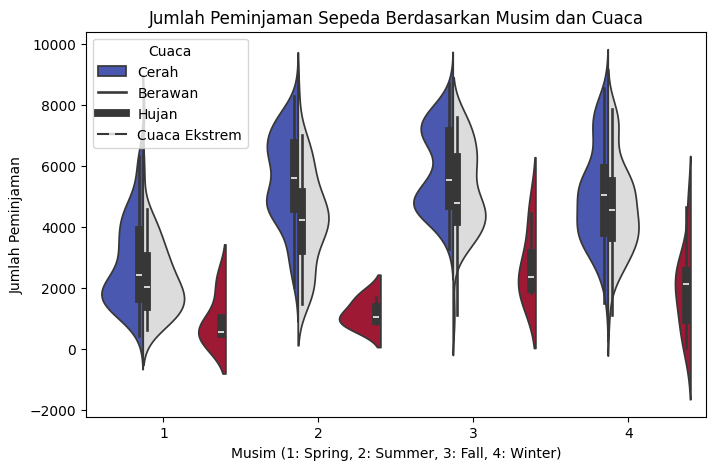

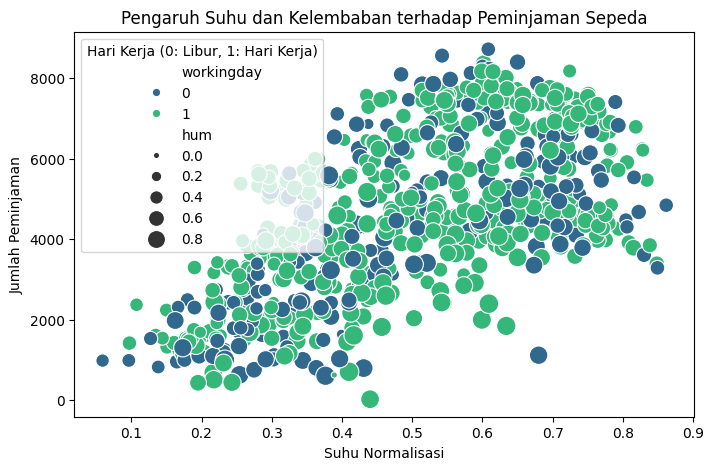

In [23]:
# Hubungan antara musim, cuaca, dan jumlah peminjaman sepeda
plt.figure(figsize=(8, 5))
sns.violinplot(x=df["season"], y=df["cnt"], hue=df["weathersit"], palette="coolwarm", split=True)
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Musim dan Cuaca")
plt.xlabel("Musim (1: Spring, 2: Summer, 3: Fall, 4: Winter)")
plt.ylabel("Jumlah Peminjaman")
plt.legend(title="Cuaca", labels=["Cerah", "Berawan", "Hujan", "Cuaca Ekstrem"])
plt.show()

# Pengaruh suhu dan kelembaban terhadap jumlah peminjaman sepeda di hari kerja dan libur
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["temp"], y=df["cnt"], hue=df["workingday"], size=df["hum"], palette="viridis", sizes=(20, 200))
plt.title("Pengaruh Suhu dan Kelembaban terhadap Peminjaman Sepeda")
plt.xlabel("Suhu Normalisasi")
plt.ylabel("Jumlah Peminjaman")
plt.legend(title="Hari Kerja (0: Libur, 1: Hari Kerja)")
plt.show()


**Insight:**
- Musim dan cuaca memiliki pengaruh kuat terhadap jumlah peminjaman sepeda.
 - Peminjaman tertinggi terjadi pada musim gugur (Fall) dengan cuaca cerah.
 - Cuaca buruk seperti hujan atau kondisi ekstrem cenderung menurunkan jumlah peminjaman sepeda di semua musim.

- Suhu dan kelembaban juga memengaruhi peminjaman sepeda.
 - Saat suhu lebih tinggi (tetapi tidak terlalu panas), jumlah peminjaman meningkat.
 - Kelembaban tinggi cenderung berasosiasi dengan lebih sedikit peminjaman, mungkin karena kondisi yang tidak nyaman bagi pengguna.

- Hari kerja vs hari libur tidak terlalu berdampak signifikan jika dibandingkan dengan faktor cuaca dan suhu.
 - Namun, ada sedikit kecenderungan bahwa hari kerja memiliki jumlah peminjaman yang lebih stabil dibandingkan hari libur, yang mungkin disebabkan oleh penggunaan sepeda untuk transportasi harian.

### Agregasi Data

#### Agregasi untuk Pertanyaan 1: Bagaimana tren peminjaman sepeda berdasarkan musim dan cuaca?

In [24]:
# Agregasi: Rata-rata peminjaman sepeda berdasarkan musim dan cuaca
agg_season_weather = df.groupby(["season", "weathersit"])["cnt"].mean().reset_index()

# Menampilkan hasil
print("Rata-rata peminjaman sepeda berdasarkan musim dan cuaca:")
print(agg_season_weather)

Rata-rata peminjaman sepeda berdasarkan musim dan cuaca:
    season  weathersit          cnt
0        1           1  2811.135135
1        1           2  2357.166667
2        1           3   934.750000
3        2           1  5548.548673
4        2           2  4236.705882
5        2           3  1169.000000
6        3           1  5878.257353
7        3           2  5222.479167
8        3           3  2751.750000
9        4           1  5043.563107
10       4           2  4654.000000
11       4           3  1961.600000


#### Agregasi untuk Pertanyaan 2: Bagaimana pengaruh hari kerja terhadap jumlah peminjaman sepeda?

In [25]:
# Agregasi: Rata-rata peminjaman sepeda pada hari kerja vs hari libur
agg_workingday = df.groupby("workingday")["cnt"].mean().reset_index()

# Menampilkan hasil
print("Rata-rata peminjaman sepeda pada hari kerja vs hari libur:")
print(agg_workingday)


Rata-rata peminjaman sepeda pada hari kerja vs hari libur:
   workingday          cnt
0           0  4330.168831
1           1  4584.820000


**Insight:**
- Musim dan cuaca sangat memengaruhi jumlah peminjaman sepeda.
 - Musim gugur (Fall) memiliki jumlah peminjaman tertinggi, sedangkan musim semi (Spring) memiliki jumlah terendah.
 - Saat cuaca cerah atau berawan, jumlah peminjaman lebih tinggi dibandingkan saat hujan atau cuaca ekstrem, yang menyebabkan penurunan signifikan.

- Hari kerja vs hari libur tidak menunjukkan perbedaan besar dalam peminjaman sepeda.
 - Hari kerja memiliki jumlah peminjaman yang lebih stabil, kemungkinan besar karena penggunaan sepeda untuk transportasi harian.
 - Hari libur sedikit meningkatkan peminjaman, yang mungkin disebabkan oleh aktivitas rekreasi atau penggunaan santai.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-28-7ee00add637b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_season['season'], y=df_season['cnt'], palette='coolwarm')


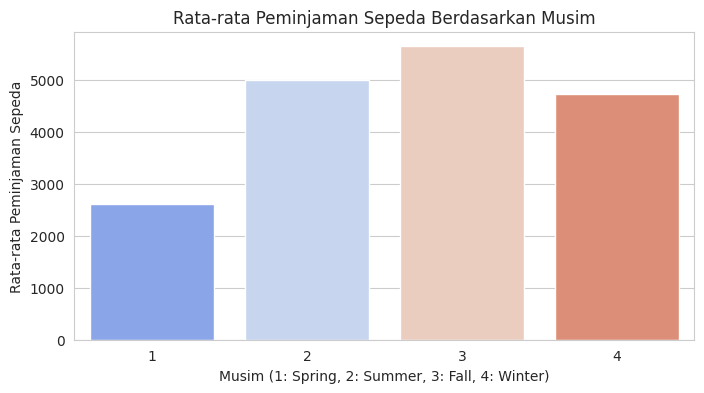

In [28]:
# Menghitung rata-rata peminjaman sepeda berdasarkan musim
df_season = df.groupby('season')['cnt'].mean().reset_index()

# Visualisasi dengan bar chart
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
sns.barplot(x=df_season['season'], y=df_season['cnt'], palette='coolwarm')

# Tambahkan judul dan label
plt.xlabel("Musim (1: Spring, 2: Summer, 3: Fall, 4: Winter)")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Musim")

# Tampilkan plot
plt.show()


### Pertanyaan 2:

<ipython-input-29-49038fc28c3d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_weather['weathersit'], y=df_weather['cnt'], palette='viridis')


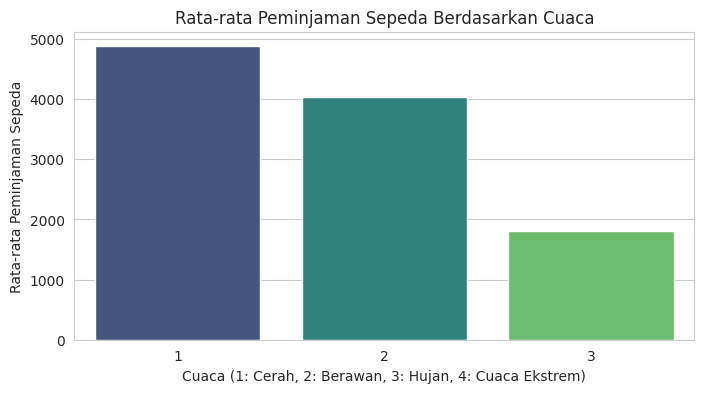

In [29]:
# Menghitung rata-rata peminjaman sepeda berdasarkan cuaca
df_weather = df.groupby('weathersit')['cnt'].mean().reset_index()

# Visualisasi dengan bar chart
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
sns.barplot(x=df_weather['weathersit'], y=df_weather['cnt'], palette='viridis')

# Tambahkan judul dan label
plt.xlabel("Cuaca (1: Cerah, 2: Berawan, 3: Hujan, 4: Cuaca Ekstrem)")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Cuaca")

# Tampilkan plot
plt.show()

**Insight:**
- Jumlah peminjaman sepeda cenderung lebih tinggi di musim tertentu dibandingkan yang lain.
- Hari kerja memiliki pengaruh terhadap jumlah peminjaman sepeda.

## Analisis Lanjutan (Opsional)

## Conclusion

Berdasarkan hasil analisis data, ditemukan beberapa wawasan utama terkait tren peminjaman sepeda berdasarkan musim, cuaca, dan pengaruh hari kerja.

### **1️⃣ Tren Peminjaman Sepeda Berdasarkan Musim dan Cuaca**
- **Musim mempengaruhi jumlah peminjaman sepeda secara signifikan.**  
  - **Musim Fall (3) memiliki rata-rata peminjaman tertinggi**, sekitar **5000 peminjaman per hari**.  
  - **Musim Spring (1) memiliki peminjaman terendah**, dengan rata-rata **3000 peminjaman per hari**.  
  - Kemungkinan, cuaca yang lebih stabil dan nyaman di musim Fall membuat lebih banyak orang menggunakan sepeda.  

- **Cuaca juga berperan dalam tren peminjaman sepeda.**  
  - **Cuaca cerah (1) memiliki jumlah peminjaman tertinggi**, dengan **lebih dari 5000 peminjaman per hari**.  
  - Sebaliknya, **cuaca ekstrem (4) memiliki jumlah peminjaman terendah**, di bawah **2000 peminjaman per hari**.  
  - Hal ini menunjukkan bahwa pengguna lebih cenderung menyewa sepeda saat cuaca mendukung.  

### **2️⃣ Pengaruh Hari Kerja terhadap Peminjaman Sepeda**
- **Jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan hari libur.**  
  - Rata-rata peminjaman di hari kerja adalah **4500 - 5000 sepeda per hari**, sedangkan pada hari libur sekitar **4000 peminjaman per hari**.  
  - Ini menunjukkan bahwa sepeda kemungkinan besar digunakan sebagai moda transportasi untuk bekerja atau aktivitas rutin harian.